## Import Necessary Libraries


In [1]:
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

In [2]:
%matplotlib inline

In [3]:
################################
### ADD EXTRA LIBRARIES HERE ###
################################
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import grid_search

## Load the Data and Perform an Initial Exploration

In [4]:
def load_data():
    """Load the Boston dataset."""
    boston = datasets.load_boston()
    return boston

In [5]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    ###################################
    ### Step 1. YOUR CODE GOES HERE ###
    ###################################

    # Uncomment this line for further details about the data set.    
    # print city_data['DESCR']
    
    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    num_houses = len(city_data.data)
    print "Size of data (number of houses)? " + str(num_houses)
    
    # Number of features?
    num_features = len(city_data.data[0])
    print "Number of features? " + str(num_features)
    
    # Minimum price?
    min_price = np.min(housing_prices)
    print "Minimum price (in $1000's)? " + str(min_price)
    
    # Maximum price?
    max_price = np.max(housing_prices)
    print "Maximum price (in $1000's)? " + str(max_price)
    
    # Calculate mean price?
    mean_price = np.mean(housing_prices)
    print "Calculate mean price (in $1000's)? " + str(mean_price)
    
    # Calculate median price?
    median_price = np.median(housing_prices)
    print "Calculate median price (in $1000's)? " + str(median_price)
    
    # Calculate standard deviation?
    std_price = np.std(housing_prices)
    print "Calculate standard deviation (in $1000's)? " + str(std_price)
    
    
    # I added a plot to help illsutrate these diescriptive statistics.    
    pl.figure()
    pl.title('Distribution of Boston House Prices')
    pl.hist(city_data.target, bins=50., color='c')
    pl.xlabel('Price ($1000\'s)')
    pl.ylabel('Number of Records')
    median_label = 'Median of %2.2f' % median_price
    pl.axvline(median_price, color='r', linestyle='solid', linewidth=2, label=median_label)
    mean_label = 'Mean of %2.2f' % mean_price
    pl.axvline(mean_price, color='b', linestyle='solid', linewidth=2, label=mean_label)
    pl.legend()
    pl.show()

Size of data (number of houses)? 506
Number of features? 13
Minimum price (in $1000's)? 5.0
Maximum price (in $1000's)? 50.0
Calculate mean price (in $1000's)? 22.5328063241
Calculate median price (in $1000's)? 21.2
Calculate standard deviation (in $1000's)? 9.18801154528


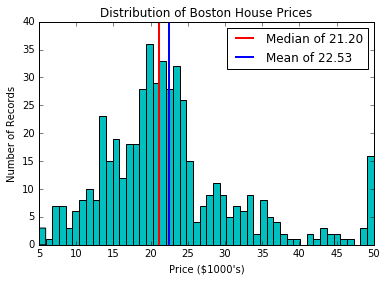

In [6]:
city_data = load_data()
explore_city_data(city_data)

## How Does Each Feature Relate to the Target?

Some of the decisions made as a part of the analysis for this project is dependent upon the shape that the features take when they are plotted against the target.

In [7]:
def plot_each_feature_vs_target(city_data):
    feature_names = city_data['feature_names'] 
    data = city_data.data
    targets = city_data.target
    
    for i in xrange(len(feature_names)):
        feature_data = [ datum[i] for datum in data]
        feature_name = feature_names[i]
        pl.figure()
        pl.title("Boston House Data: " + feature_name + " vs MEDV")
        pl.scatter(feature_data, city_data.target, alpha=0.2)
        pl.xlabel(feature_name)
        pl.ylabel('MEDV ($1000)')
        pl.show()
        

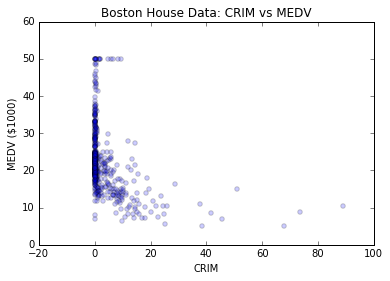

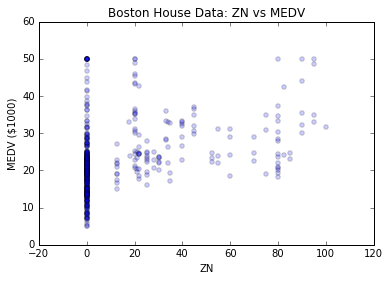

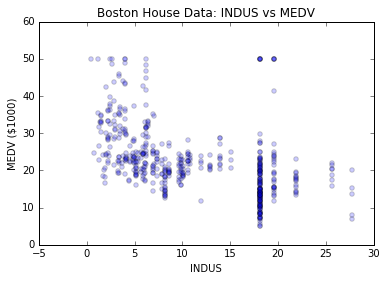

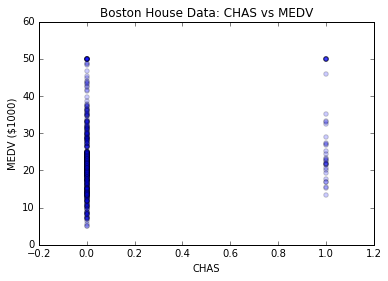

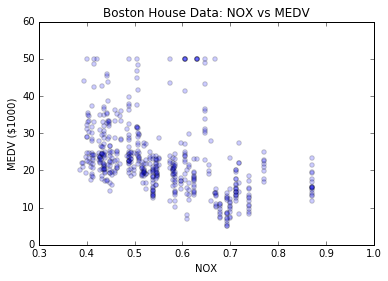

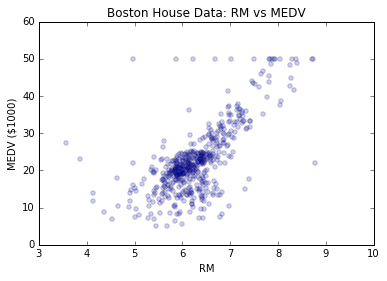

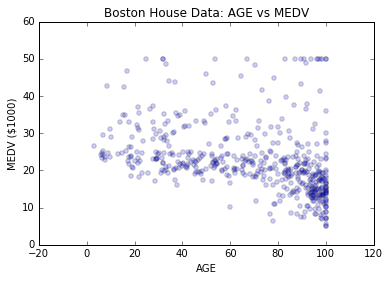

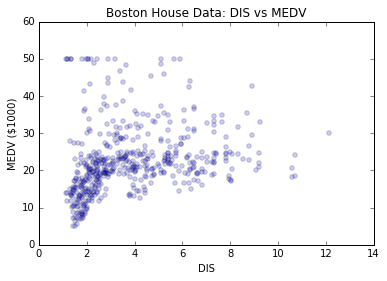

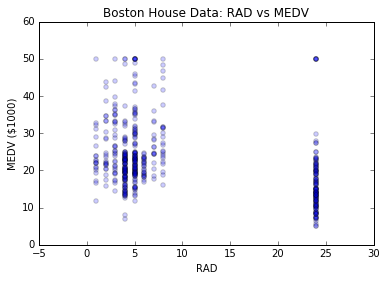

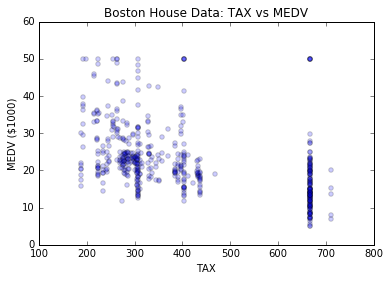

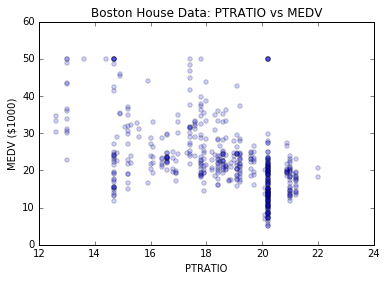

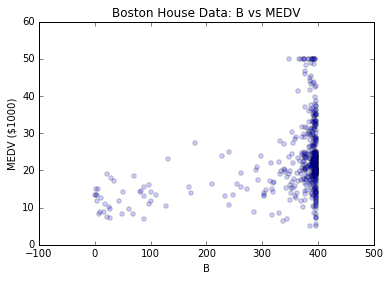

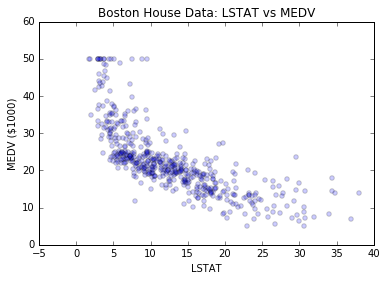

In [8]:
city_data = load_data()
plot_each_feature_vs_target(city_data)

## Remainder of the Initial Project

The initial project was quite strictly defined. The remainder of the code in this section would constitute the completion of the project, but supplementary alsysis is included in the sections that follow.

In [9]:
def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    ###################################
    ### Step 2. YOUR CODE GOES HERE ###
    ###################################
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    return X_train, y_train, X_test, y_test

In [10]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################

    # The following page has a table of scoring functions in sklearn:
    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    return mean_squared_error(label, prediction) 

In [11]:
def learning_curve(depth, X_train, y_train, X_test, y_test, show_plot=True):
    """Calculate the performance of the model after a set of training data."""

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))
    
    if show_plot:
        print "Decision Tree with Max Depth: " + str(depth)

    for i, s in enumerate(sizes):
        s = int(s)
        
        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    if show_plot:
        learning_curve_graph(depth, sizes, train_err, test_err)
    return [sizes, train_err, test_err]

In [12]:
def learning_curve_graph(depth, sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    title = "Decision Trees with Max Depth " + str(depth) + ": \n Performance vs Training Size"
    pl.title(title)
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.xlim(sizes[0], sizes[-1])
    pl.show()

In [13]:
def model_complexity(X_train, y_train, X_test, y_test, show_plot=True):
    """Calculate the performance of the model as model complexity increases."""

    if show_plot:
        print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    if show_plot:
        model_complexity_graph(max_depth, train_err, test_err)
    return [max_depth, train_err, test_err]

In [14]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.xlim(max_depth[0], max_depth[-1])
    pl.show()

In [15]:
def fit_predict_model(city_data, print_output=True):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    reg = grid_search.GridSearchCV(regressor, parameters, scoring=scorer)
                             

    # Fit the learner to the training data to obtain the best parameter set
    reg = reg.fit(X, y)
    best_model = reg.best_estimator_
    if print_output:
        print "Final Model: "
        print best_model

        print "All scores: " + str(reg.grid_scores_)
    
    # I have added additional print statements to help undertand output of the Grid Search.     
    optim_max_depth = reg.best_params_['max_depth']
    score = reg.best_score_
    
    if print_output:
        print "The optimal max_depth parameter found by Grid Search: " + str(optim_max_depth)
        print "The score given by Grid Search for the optimal model: " + str(score)
    
    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = best_model.predict([x])
    
    if print_output:
        print "House: " + str(x)
        print "Prediction: " + str(y)
    
    # By returning this tuple of max_depth, model score and predictin, it is possible to analyse a sample of results.    
    return (optim_max_depth, score, y[0])


In [16]:
## In the case of the documentation page for GridSearchCV, it might be the case that the example is just a 
# demonstration of syntax for use of the function, rather than a statement about 
def main(sample_multiple_results = False, sample_size = 1000):
    """Analyze the Boston housing data. Evaluate and validate the
    performanance of a Decision Tree regressor on the housing data.
    Fine tune the model to make prediction on unseen data."""

    # Load data
    city_data = load_data()

    if sample_multiple_results:
        results = []
        for i in xrange(sample_size):
            results.append(fit_predict_model(city_data, False))
        return results
    else:
        # Explore the data
        explore_city_data(city_data)

        # Training/Test dataset split
        X_train, y_train, X_test, y_test = split_data(city_data)

        # Learning Curve Graphs
        max_depths = [1,2,3,4,5,6,7,8,9,10]
        for max_depth in max_depths:
            learning_curve(max_depth, X_train, y_train, X_test, y_test)

        # Model Complexity Graph
        model_complexity(X_train, y_train, X_test, y_test)

        # Tune and predict Model
        fit_predict_model(city_data)
    

#### The standard output of the main project function.

Size of data (number of houses)? 506
Number of features? 13
Minimum price (in $1000's)? 5.0
Maximum price (in $1000's)? 50.0
Calculate mean price (in $1000's)? 22.5328063241
Calculate median price (in $1000's)? 21.2
Calculate standard deviation (in $1000's)? 9.18801154528


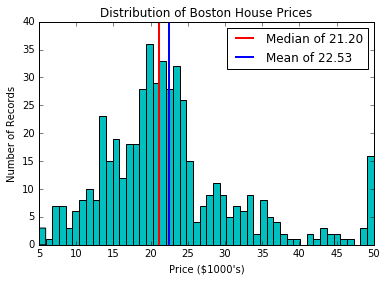

Decision Tree with Max Depth: 1


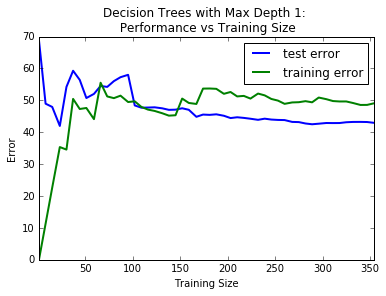

Decision Tree with Max Depth: 2


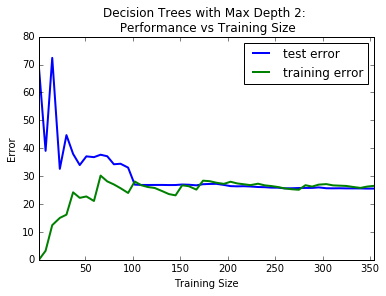

Decision Tree with Max Depth: 3


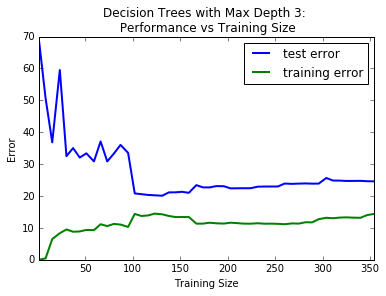

Decision Tree with Max Depth: 4


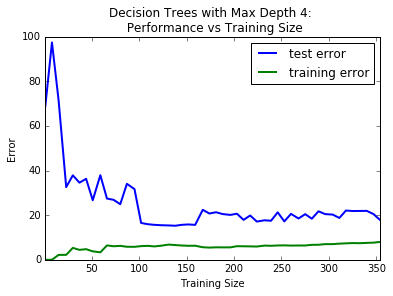

Decision Tree with Max Depth: 5


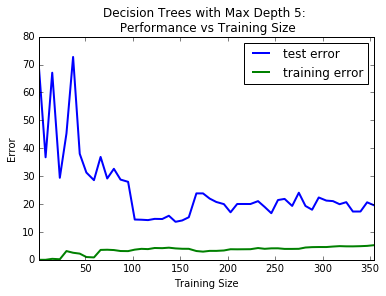

Decision Tree with Max Depth: 6


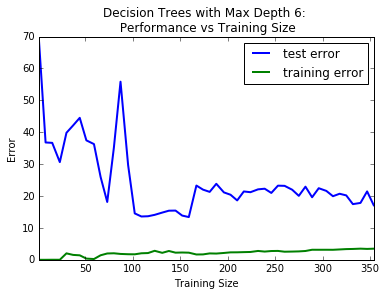

Decision Tree with Max Depth: 7


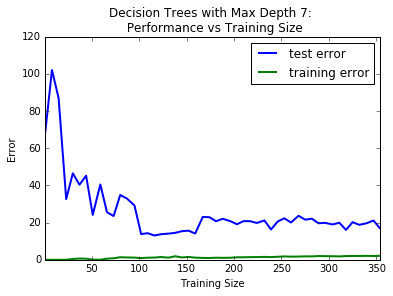

Decision Tree with Max Depth: 8


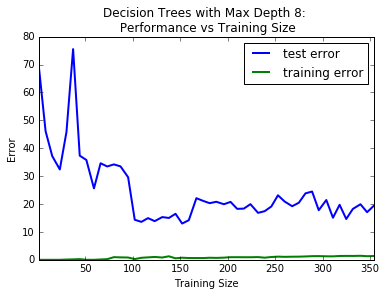

Decision Tree with Max Depth: 9


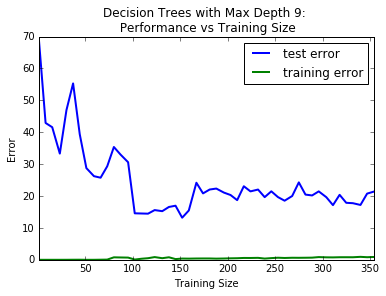

Decision Tree with Max Depth: 10


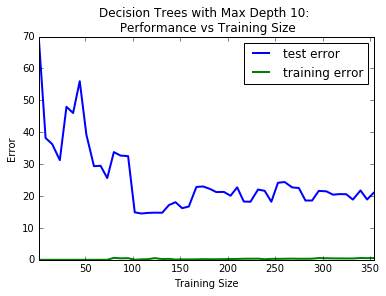

Model Complexity: 


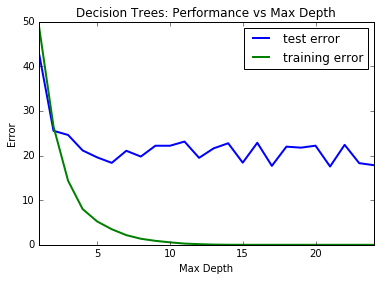

Final Model: 
DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
All scores: [mean: -68.08279, std: 25.52601, params: {'max_depth': 1}, mean: -46.72022, std: 21.02827, params: {'max_depth': 2}, mean: -44.96641, std: 13.29444, params: {'max_depth': 3}, mean: -39.62245, std: 6.38824, params: {'max_depth': 4}, mean: -42.69985, std: 9.65592, params: {'max_depth': 5}, mean: -36.41007, std: 10.00762, params: {'max_depth': 6}, mean: -39.96001, std: 12.96404, params: {'max_depth': 7}, mean: -38.68045, std: 10.50942, params: {'max_depth': 8}, mean: -40.71171, std: 11.81755, params: {'max_depth': 9}, mean: -43.35272, std: 5.84340, params: {'max_depth': 10}]
The optimal max_depth parameter found by Grid Search: 6
The score given by Grid Search for the optimal model: -36.4100682266
House: [11.95, 0.0, 18.

In [17]:
main()

## Explore 100 Sets of Learning Curves

In an attempt to better understand the true shape of the learning curves, the following code takes the data for 100 learning curves and draws those curves with a superimposed average set of curves on top. A corollary to this process is applying the same averaged curves for the model complexity curve.

In [18]:
def draw_averaged_learning_curves(max_depths, sets_of_learning_curve_data):
    for max_depth in max_depths:
        learning_curve_data = sets_of_learning_curve_data[max_depth - 1]
        sizes = learning_curve_data[0][0]
        pl.figure()
        title = "Decision Trees with Max Depth " + str(max_depth) + ": \n Performance vs Training Size for 100 iterations"
        pl.title(title)
        all_test_errors = []
        all_training_errors = []
        for learning_curve in learning_curve_data:
            training_error = learning_curve[1]
            test_error = learning_curve[2]
            all_training_errors.append(training_error)
            all_test_errors.append(test_error)
            pl.plot(sizes, training_error, color='g', alpha= 0.03, lw=1)
            pl.plot(sizes, test_error, color='b', alpha= 0.03, lw=1)

        pl.plot(sizes, np.mean(all_training_errors, axis=0), color='g', lw=2, label = 'mean training error')
        pl.plot(sizes, np.mean(all_test_errors, axis=0), color='b', lw=2, label = 'mean test error')
        pl.legend()
        pl.xlabel('Training Size')
        pl.ylabel('Error')
        pl.ylim(0,200)
        pl.xlim(0,sizes[-1])
        pl.show()

In [19]:
def draw_averaged__model_complexity(sets_of_model_complexity_data):
    pl.figure()
    title = "Decision Trees: \n Performance vs Max Depth for 100 iterations"
    pl.title(title)
    all_test_errors = []
    all_training_errors = []
    max_depth = sets_of_model_complexity_data[0][0]
    for model_complexity_curve in sets_of_model_complexity_data:
        training_error = model_complexity_curve[1]
        test_error = model_complexity_curve[2]
        all_training_errors.append(training_error)
        all_test_errors.append(test_error)
        pl.plot(max_depth, training_error, color='g', alpha= 0.01, lw=1)
        pl.plot(max_depth, test_error, color='b', alpha= 0.01, lw=1)
    
    mean_training_errors = np.mean(all_test_errors, axis=0)
    mean_test_errors = np.mean(all_test_errors, axis=0)
    
    pl.plot(max_depth, mean_training_errors, color='g', lw=2, label = 'mean training error')
    pl.plot(max_depth, mean_test_errors, color='b', lw=2, label = 'mean test error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.xlim(max_depth[0], max_depth[-1])
    pl.show()
    
    # Print the max_depth value where the mean test error is minimised.
    minimum_mean_test_error = np.min(mean_test_errors)
    optimal_max_depth = max_depth[mean_test_errors.tolist().index(minimum_mean_test_error)]
    print "Optimal Maximum Depth: " + str(optimal_max_depth)

In [20]:
def explore_100_iterations():
    city_data = load_data()
    max_depths = [1,2,3,4,5,6,7,8,9,10]
    one_hundred_sets_of_learning_curve_data = []
    one_hundred_sets_of_model_complexity_data = []
    
    print "This will take some time. Now might be a good time to take a break and make a nice hot cup of tea."
    
    for max_depth in max_depths:
        one_hundred_sets_of_learning_curve_data.append([])
        for i in xrange(100):
            X_train, y_train, X_test, y_test = split_data(city_data)
            
            learning_curve_data = learning_curve(max_depth, X_train, y_train, X_test, y_test, False)
            one_hundred_sets_of_learning_curve_data[max_depth - 1].append(learning_curve_data)
            
            model_complexity_data = model_complexity(X_train, y_train, X_test, y_test, False)
            one_hundred_sets_of_model_complexity_data.append(model_complexity_data)
            
    draw_averaged_learning_curves(max_depths, one_hundred_sets_of_learning_curve_data)
    draw_averaged__model_complexity(one_hundred_sets_of_model_complexity_data)

This will take some time. Now might be a good time to take a break and make a nice hot cup of tea.


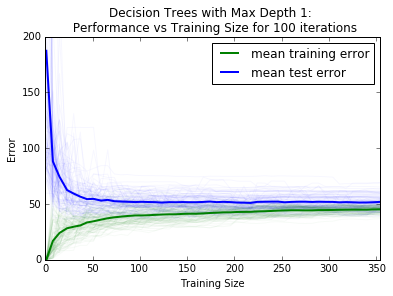

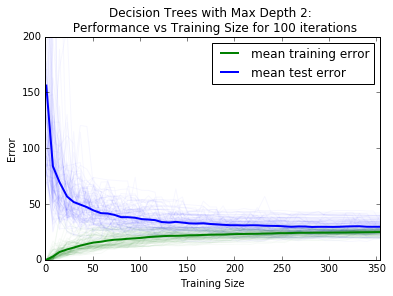

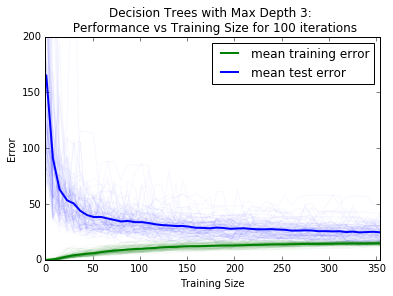

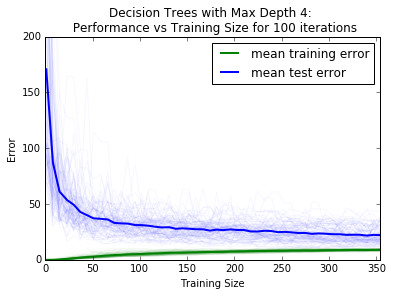

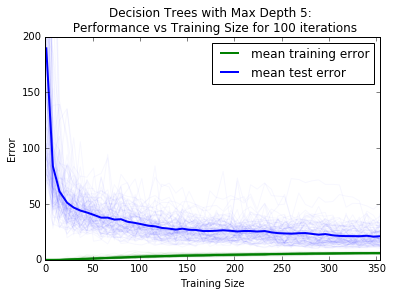

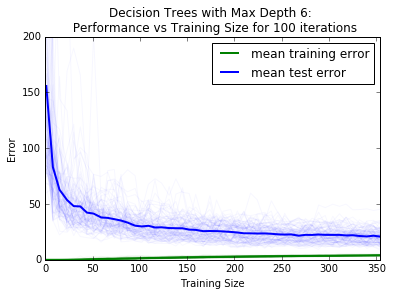

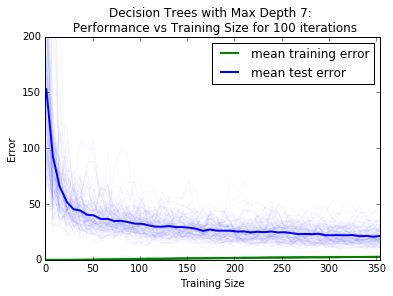

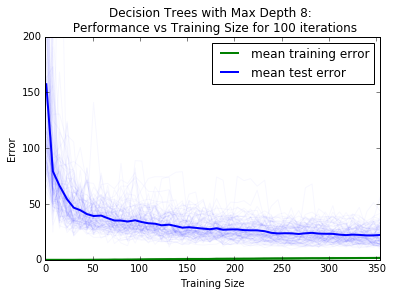

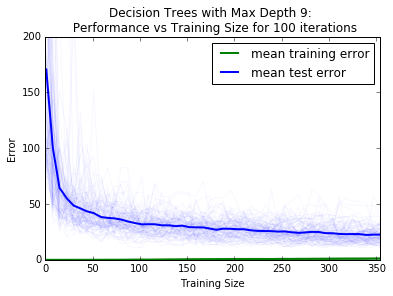

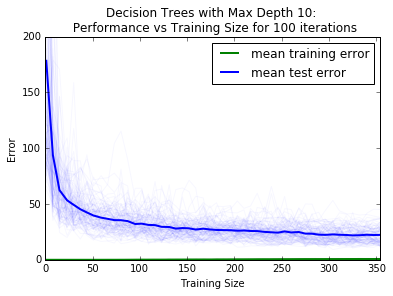

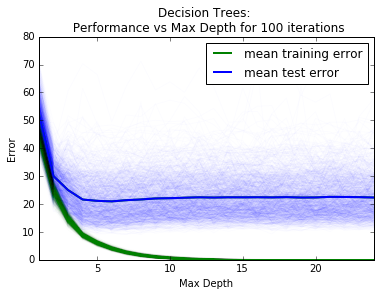

Optimal Maximum Depth: 6


In [21]:
explore_100_iterations()

## Analyse a Sample of 1000 Results

After running the main function that groups the initial project code together, it becomes clear that the inherent instability of the Decision Tree Regressor prevents the model from converging on a single optimal result. The following analysis takes a sample of 1000 results and attempts to better understand the distribution of this sample. Ultimately, the goal is to determine which model can be considerered the representative optimal result.

In [22]:
sampled_results = main(True, 1000)

In [23]:
from collections import Counter
import pandas as pd

# TODO: make this cleaner by putting the data into a DataFrame and doing the analysis within the DataFrame.

# Extract results for the 1000 iterations and count the unique results based on rounded values. 
results_except_scores = [(result[0], result[2]) for result in sampled_results]
rounded_results = [tuple(np.around(result, decimals=4)) for result in results_except_scores]
counted_rounded_results = Counter(rounded_results)
sorted_keys = sorted(counted_rounded_results)
rounded_result_counts_sorted_by_depth = [counted_rounded_results[k] for k in sorted_keys]


# From the results, calculate the mean model scores for each of the optimal max depths.
optimal_depths = [k[0] for k in Counter(rounded_results).keys()]
sorted_optimal_depths = sorted(optimal_depths)
mean_scores = []
for max_depth in sorted_optimal_depths:
    mean_score = np.around(np.mean([result[1] for result in sampled_results if result[0] == max_depth]), decimals=4)
    mean_scores.append(mean_score)
    

# Collect the results of the above grouping and analysis and into an easily rendered and read DataFrame.
data = []
columns = ['Frequency', 'Max.Depth', 'Mean.Score', 'Prediction']
for i in xrange(len(sorted_keys)):
    datum = {
        'Frequency': rounded_result_counts_sorted_by_depth[i],
        'Max.Depth': sorted_keys[i][0],
        'Mean.Score': mean_scores[i],
        'Prediction': sorted_keys[i][1]
    }
    data.append(datum)

sampled_results_df = pd.DataFrame(data)
print sampled_results_df

   Frequency  Max.Depth  Mean.Score  Prediction
0        502          4    -35.8884     21.6297
1         71          5    -37.8514     20.9678
2        166          6    -36.5045     20.7660
3        101          7    -37.0142     19.9975
4         57          8    -37.3967     18.8167
5         51          9    -37.7023     19.3273
6         52         10    -37.7157     20.7200


From this table, it appears that the 'Frequency' and 'Mean.Score' columns might be correlated. Lets see if this is the case.

In [24]:
np.corrcoef(sampled_results_df['Frequency'], sampled_results_df['Mean.Score'])

array([[ 1.        ,  0.88691063],
       [ 0.88691063,  1.        ]])

It appears that they are!

In [25]:
sample_size = sum(sampled_results_df['Frequency'])
mean_max_depth = sum(sampled_results_df['Frequency'] * sampled_results_df['Max.Depth']) / sample_size

index_of_median_depth = [i for i, v in enumerate(np.cumsum(sampled_results_df['Frequency'])) if v > sample_size / 2][0]
median_max_depth = sampled_results_df['Max.Depth'][index_of_median_depth]

print "The mean optimal Max Depth: " + str(mean_max_depth)
print "The median optimal Max Depth: " + str(median_max_depth)

The mean optimal Max Depth: 5.501
The median optimal Max Depth: 4.0


## Validate the Prediction with KNN

One way to see how reasonable the prediction for the test house is is to perform a K Neaerest Neighbors search for similar houses from the dataset and then see how close the similar houses are in terms of both the target values and the feature values.

In [29]:
# http://scikit-learn.org/stable/modules/neighbors.html#finding-the-nearest-neighbors
from sklearn.neighbors import NearestNeighbors

def find_nearest_neighbor_indices(x, data):  # x is your vector and X is the data set.
   knn = NearestNeighbors( n_neighbors = 10 )
   knn.fit(data)
   dist, indices = knn.kneighbors(x)
   return indices

city_data = load_data()
x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
indices = find_nearest_neighbor_indices([x], city_data.data)
neighbor_avg = np.mean(city_data.target[indices])
print "Nearest Neighbours average: " + str(neighbor_avg)

target_std = np.std(city_data.target)
knn_avg_in_std_key = '(Pred - 10-NN.avg)/target.std'
sampled_results_df[knn_avg_in_std_key] = (sampled_results_df['Prediction'] - neighbor_avg)/target_std
sampled_results_df[['Max.Depth', 'Prediction', knn_avg_in_std_key]]

Nearest Neighbours average: 21.52


,Max.Depth,Prediction,(Pred - 10-NN.avg)/target.std
0,4,21.6297,0.011939
1,5,20.9678,-0.060100
2,6,20.7660,-0.082063
3,7,19.9975,-0.165705
4,8,18.8167,-0.294220
5,9,19.3273,-0.238648
6,10,20.7200,-0.087070


The values for the difference between the predictions and the KNN mean target value in terms of target standard deviations are acceptably small and suggest the models are reasonably accurate.